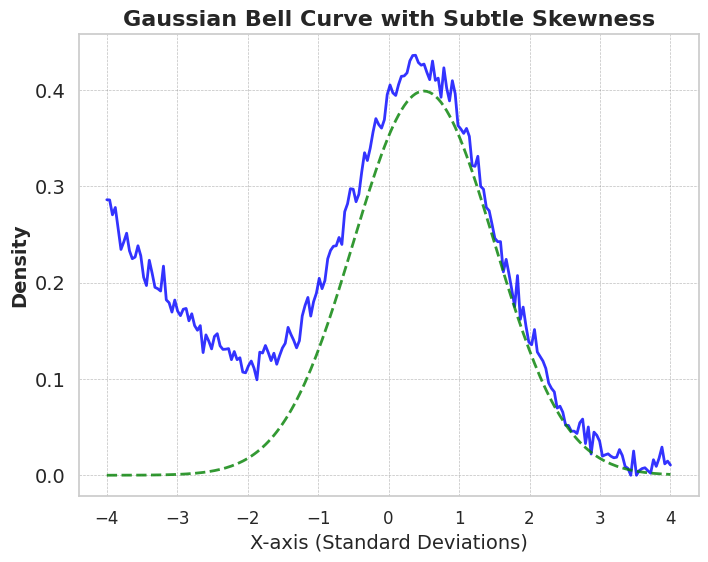

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Parameters for the Gaussian
mean = 0.5  # Center of the Gaussian
std_dev = 1  # Standard deviation

# Generate x values and Gaussian y values
x = np.linspace(-4, 4, 200)
y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

# Add subtle skewed noise
noise = np.random.normal(0, 0.01, size=x.shape) + 0.03 * np.exp(-(x - mean) / 2)  # Reduced skewness
y_noisy = y + noise

# Ensure no negative values (optional)
y_noisy = np.maximum(y_noisy, 0)

# Create the plot with Seaborn
sns.set(style="whitegrid")  # Set Seaborn style
plt.figure(figsize=(8, 6))

# Plot the noisy data as a line plot
sns.lineplot(x=x, y=y_noisy, color="blue", linewidth=2, label="Subtly Skewed Noisy Data", alpha=0.8, legend=False)

# Overlay the ideal Gaussian
sns.lineplot(x=x, y=y, color="green", linewidth=2, linestyle='--', label="Ideal Gaussian Bell", alpha=0.8, legend=False)

# Add titles and labels with updated fontsize
plt.title("Gaussian Bell Curve with Subtle Skewness", fontsize=16, weight='bold')
plt.xlabel("X-axis (Standard Deviations)", fontsize=14)
plt.ylabel("Density", fontsize=14, weight='bold')
plt.xticks(fontsize=12)  # Increase x-axis tick labels size
plt.yticks(fontsize=14)  # Increase y-axis tick labels size

# Customize the grid and layout
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

In [4]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


os.chdir('/leonardo/home/userexternal/gesposi1/dropout_rel_assessment')
PWD=os.getcwd()
print(PWD)

PATH="./FSIM_N_HPC_LenetDrop"

items = os.listdir(PATH) 

directories = [item for item in items if (os.path.isdir(os.path.join(PATH,item)) and 'lyr0-5' in item)]

Final_report = pd.DataFrame()

for config in directories:
    merge_files_path = os.path.join(PATH,config)    
    # list_items = os.listdir(dir)
    # sim_dir=[item for item in list_items if os.path.isdir(os.path.join(dir,item))]
    # merge_files_path=os.path.join(dir,sim_dir[0])
    # print(sim_dir)
    full_report= pd.read_csv(os.path.join(merge_files_path,"fsim_full_report.csv"),index_col=[0])  
    full_report['MRAD']=abs(100*(full_report['fault_ACC@1']-full_report['gold_ACC@1'])/full_report['gold_ACC@1'])
    full_report['MRADk']=abs(100*(full_report['fault_ACC@k']-full_report['gold_ACC@k'])/full_report['gold_ACC@k'])
    full_report['AbsAD']=abs((full_report['fault_ACC@1']-full_report['gold_ACC@1']))
    full_report['AbsADk']=abs((full_report['fault_ACC@k']-full_report['gold_ACC@k']))
    full_report["FsimID"]=None    
    index=(full_report['bit_faulty_pos']>-1)
    full_report.loc[index,'FsimID']=config # I capture the folder name and assign it to eavery roww of the dataframe
    full_report['split_config']=full_report['FsimID'].apply(lambda x: x.split('_')[2])

    Final_report=pd.concat([Final_report,full_report],axis=0,ignore_index=True)



/leonardo/home/userexternal/gesposi1/dropout_rel_assessment


Text(0, 0.5, 'MRAD (%)')

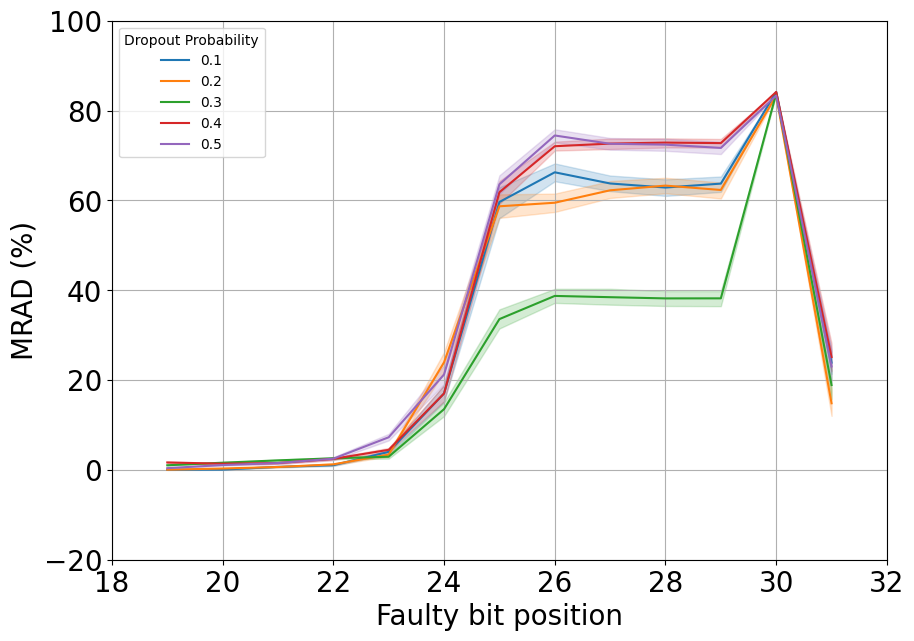

In [9]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.grid()
sns.lineplot(data=Final_report, x='bit_faulty_pos', y='MRAD', hue='Dropout Probability', palette='tab10')

ax.set_xlabel('Faulty bit position', fontsize=20)

ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), fontsize=20)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=20)
ax.set_ylabel('MRAD (%)', fontsize=20)

Text(0, 0.5, 'Accuracy (%)')

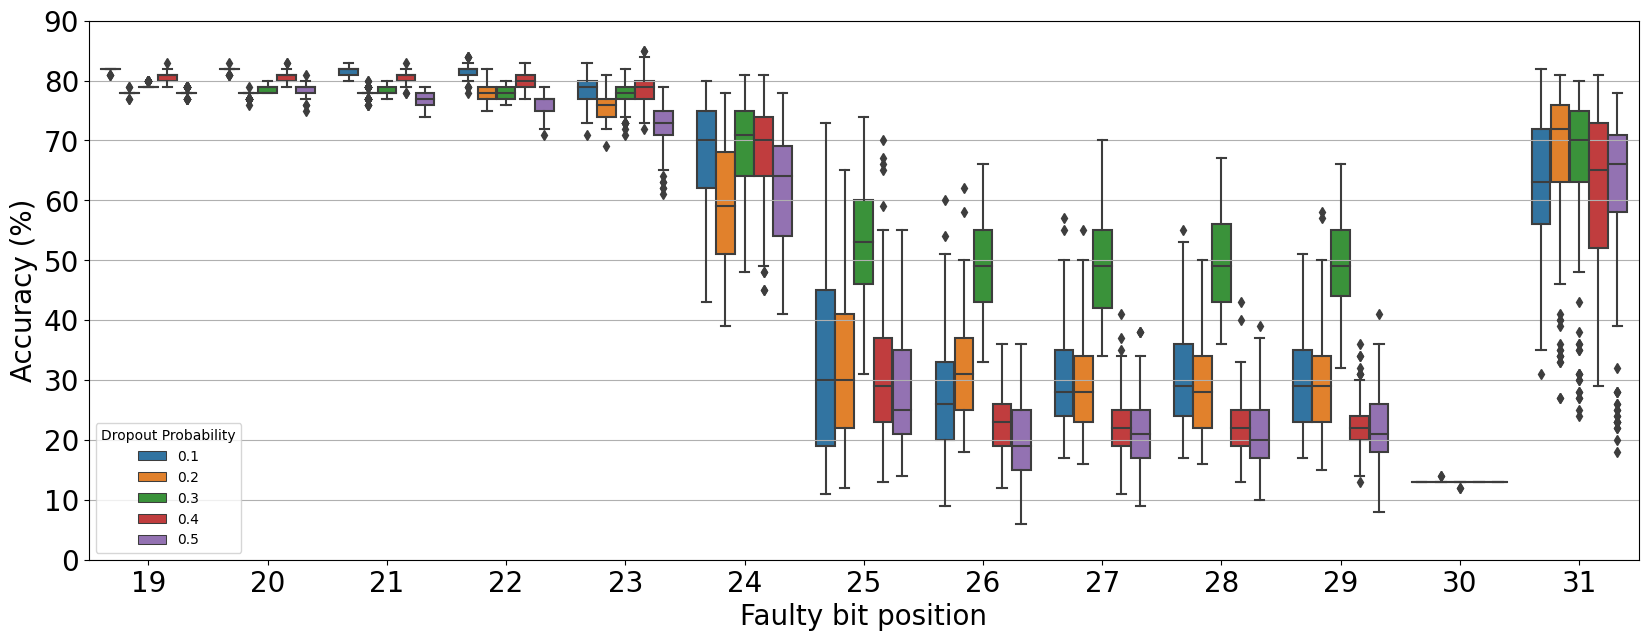

In [10]:
fig, ax = plt.subplots(1,1,figsize=(20,7))
ax.grid()
sns.boxplot(data=Final_report, x='bit_faulty_pos', y='fault_ACC@1', hue='Dropout Probability', ax=ax)

ax.set_xlabel('Faulty bit position', fontsize=20)

ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), fontsize=20)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=20)
ax.set_ylabel('Accuracy (%)', fontsize=20)

In [5]:
Final_report['fault_prec@1'].describe()

count    8125.000000
mean       48.790206
std        39.603184
min         0.303030
25%         5.284862
50%        62.567067
75%        88.984627
max        93.433440
Name: fault_prec@1, dtype: float64

I think that the high values of dropout works because the model does not become overconfident (something similar to overfitting is happening)
during training. During inference it works thanks to the scale. 

I think that the low values of dropout works because...

So the trade-off must be found

In [12]:
Final_report.columns

Index(['layer_start', 'layer_stop', 'size_tail_y', 'size_tail_x',
       'block_fault_rate', 'neuron_fault_rate', 'bit_faulty_pos',
       'Dropout Probability', 'gold_ACC@1', 'gold_ACC@k', 'img_Top1_Crit',
       'img_Top1_SDC', 'img_Top1_Masked', 'img_Topk_Crit', 'img_Topk_SDC',
       'img_Topk_Masked', 'fault_ACC@1', 'fault_ACC@k', 'Class_Top1',
       'Class_Topk', 'goldenf1_1', 'goldenf1_k', 'fault_f1@1', 'fault_f1@k',
       'goldenrec_1', 'goldenrec_k', 'fault_rec@1', 'fault_rec@k',
       'goldenprec_1', 'goldenprec_k', 'fault_prec@1', 'fault_prec@k', 'MRAD',
       'MRADk', 'AbsAD', 'AbsADk', 'FsimID', 'split_config'],
      dtype='object')

## Fault distribution

/scratch_local/ipykernel_1603137/743397835.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fault_classification = Final_report.groupby(['Dropout Probability'])['img_Top1_Crit', 'img_Top1_SDC', 'img_Top1_Masked'].mean()


Text(0, 0.5, 'Faults (%)')

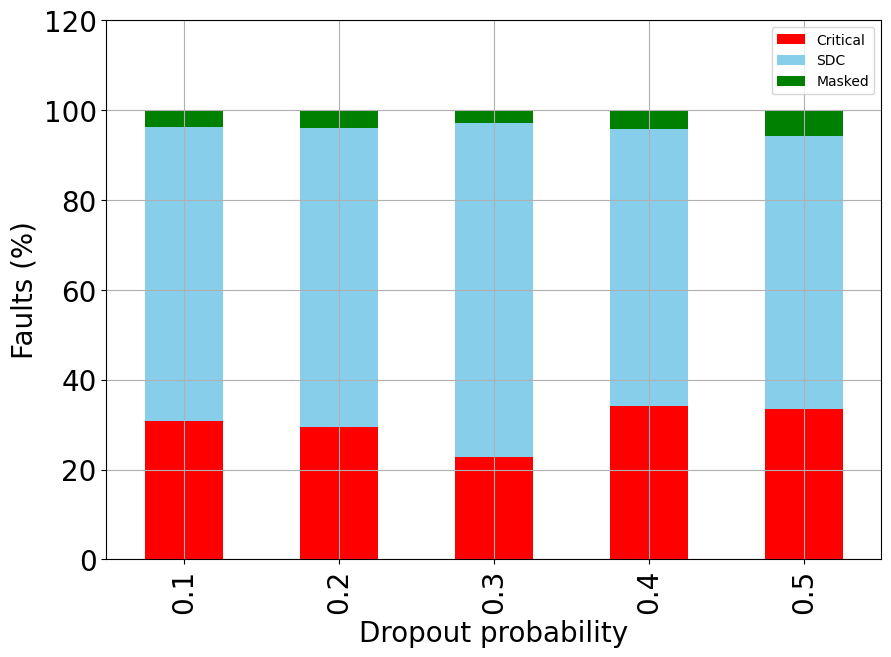

In [13]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
fault_classification = Final_report.groupby(['Dropout Probability'])['img_Top1_Crit', 'img_Top1_SDC', 'img_Top1_Masked'].mean()
fault_classification.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'], ax = ax)

ax.set_xlabel('Dropout probability', fontsize=20)
ax.grid()
ax.legend(labels=['Critical', 'SDC', 'Masked'])
ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), fontsize=20)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=20)
ax.set_ylabel('Faults (%)', fontsize=20)

/scratch_local/ipykernel_1603137/1244721950.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fault_classification = Final_report.groupby(['Dropout Probability'])['img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked'].mean()


Text(0, 0.5, 'Faults (%)')

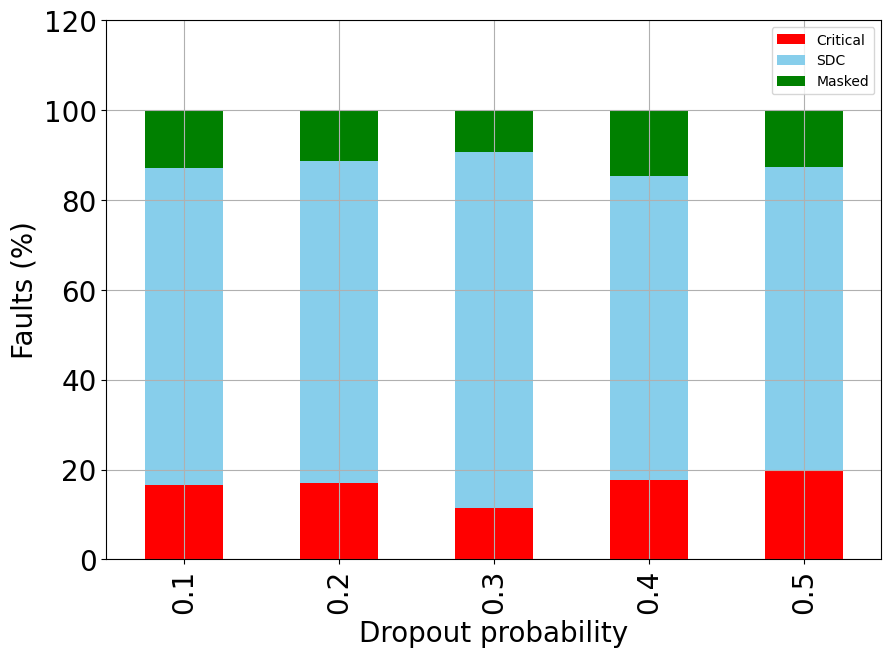

In [15]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
fault_classification = Final_report.groupby(['Dropout Probability'])['img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked'].mean()
ax.grid()
fault_classification.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'], ax = ax)

ax.set_xlabel('Dropout probability', fontsize=20)
ax.grid()
ax.legend(labels=['Critical', 'SDC', 'Masked'])
ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), fontsize=20)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=20)
ax.set_ylabel('Faults (%)', fontsize=20)


/scratch_local/ipykernel_1603137/4096445670.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fault_classification = Final_report.groupby(['Dropout Probability', 'neuron_fault_rate'])['img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked'].mean().reset_index()


Text(0, 0.5, 'Faults (%)')

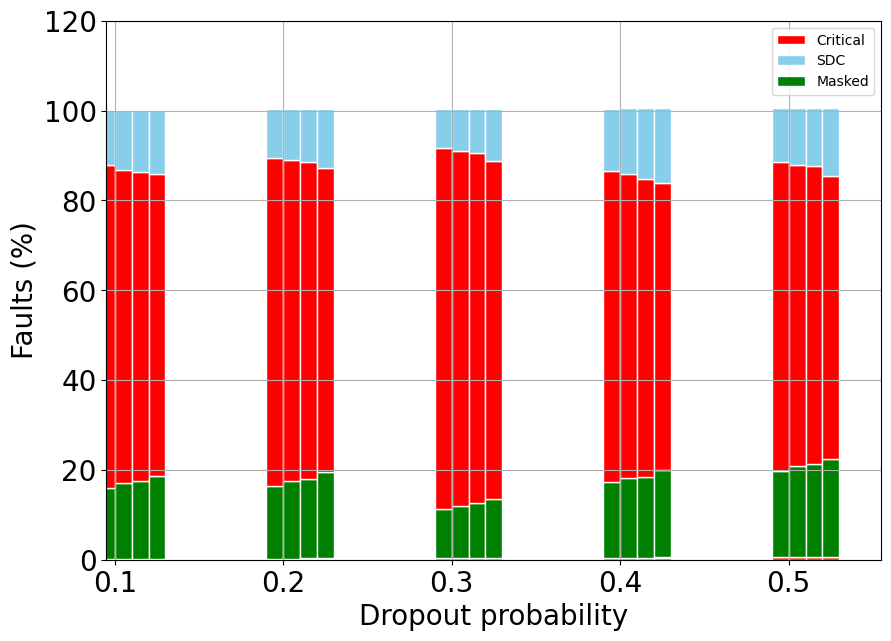

In [16]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
fault_classification = Final_report.groupby(['Dropout Probability', 'neuron_fault_rate'])['img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked'].mean().reset_index()
ax.grid()

fault_classification_1 = fault_classification[fault_classification['neuron_fault_rate']==0.02]
fault_classification_2 = fault_classification[fault_classification['neuron_fault_rate']==0.04]
fault_classification_3 = fault_classification[fault_classification['neuron_fault_rate']==0.06]
fault_classification_4 = fault_classification[fault_classification['neuron_fault_rate']==0.08]
fault_classification_5 = fault_classification[fault_classification['neuron_fault_rate']==0.1]

fault_classification_1.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'], position=-2, edgecolor='white', width=0.1, ax = ax, legend=False, rot=0)
fault_classification_2.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'], position=1, edgecolor='white', width=0.1, ax = ax, legend=False, rot=0)
fault_classification_3.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'] , position=0, edgecolor='white', width=0.1, ax = ax, legend=False, rot=0)
fault_classification_4.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'], position=-1, edgecolor='white', width=0.1, ax = ax, legend=False, rot=0)
fault_classification_5.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'], position=-2, edgecolor='white', width=0.1, ax = ax, legend=False, rot=0)

ax.set_xlabel('Dropout probability', fontsize=20)
ax.grid()
ax.legend(labels=['Critical', 'SDC', 'Masked'])
ax.set_xticks(ticks=ax.get_xticks(), labels=[0.1, 0.2, 0.3, 0.4, 0.5], fontsize=20)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=20)
ax.set_ylabel('Faults (%)', fontsize=20)

/scratch_local/ipykernel_225359/3290811390.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fault_classification = Final_report.groupby(['Dropout Probability', 'block_fault_rate'])['img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked'].mean().reset_index()


Text(0, 0.5, 'Faults (%)')

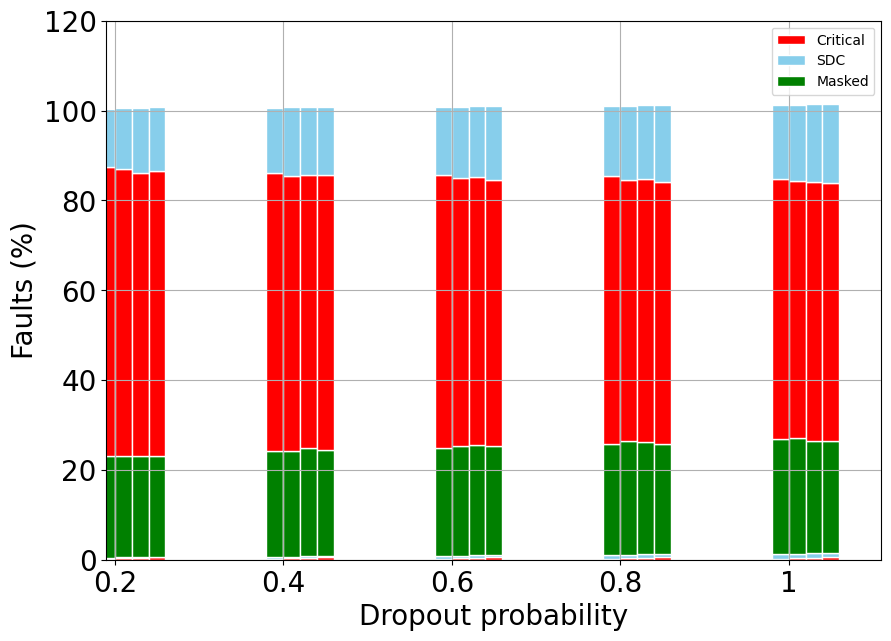

In [38]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
fault_classification = Final_report.groupby(['Dropout Probability', 'block_fault_rate'])['img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked'].mean().reset_index()
ax.grid()

fault_classification_1 = fault_classification[fault_classification['Dropout Probability']==0.1]
fault_classification_2 = fault_classification[fault_classification['Dropout Probability']==0.2]
fault_classification_3 = fault_classification[fault_classification['Dropout Probability']==0.3]
fault_classification_4 = fault_classification[fault_classification['Dropout Probability']==0.4]
fault_classification_5 = fault_classification[fault_classification['Dropout Probability']==0.5]

fault_classification_1.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'], position=-2, edgecolor='white', width=0.1, ax = ax, legend=False, rot=0)
fault_classification_2.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'], position=1, edgecolor='white', width=0.1, ax = ax, legend=False, rot=0)
fault_classification_3.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'] , position=0, edgecolor='white', width=0.1, ax = ax, legend=False, rot=0)
fault_classification_4.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'], position=-1, edgecolor='white', width=0.1, ax = ax, legend=False, rot=0)
fault_classification_5.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'], position=-2, edgecolor='white', width=0.1, ax = ax, legend=False, rot=0)

ax.set_xlabel('Dropout probability', fontsize=20)
ax.grid()
ax.legend(labels=['Critical', 'SDC', 'Masked'])
ax.set_xticks(ticks=ax.get_xticks(), labels=[0.2, 0.4, 0.6, 0.8, 1], fontsize=20)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=20)
ax.set_ylabel('Faults (%)', fontsize=20)

In [22]:
Final_report.columns

Index(['layer_start', 'layer_stop', 'size_tail_y', 'size_tail_x',
       'block_fault_rate', 'neuron_fault_rate', 'bit_faulty_pos',
       'Dropout Probability', 'gold_ACC@1', 'gold_ACC@k', 'img_Top1_Crit',
       'img_Top1_SDC', 'img_Top1_Masked', 'img_Topk_Crit', 'img_Topk_SDC',
       'img_Topk_Masked', 'fault_ACC@1', 'fault_ACC@k', 'Class_Top1',
       'Class_Topk', 'goldenf1_1', 'goldenf1_k', 'fault_f1@1', 'fault_f1@k',
       'goldenrec_1', 'goldenrec_k', 'fault_rec@1', 'fault_rec@k',
       'goldenprec_1', 'goldenprec_k', 'fault_prec@1', 'fault_prec@k', 'MRAD',
       'MRADk', 'AbsAD', 'AbsADk', 'FsimID', 'split_config'],
      dtype='object')

## Accuracy drop

Text(0, 0.5, 'Accuracy (%)')

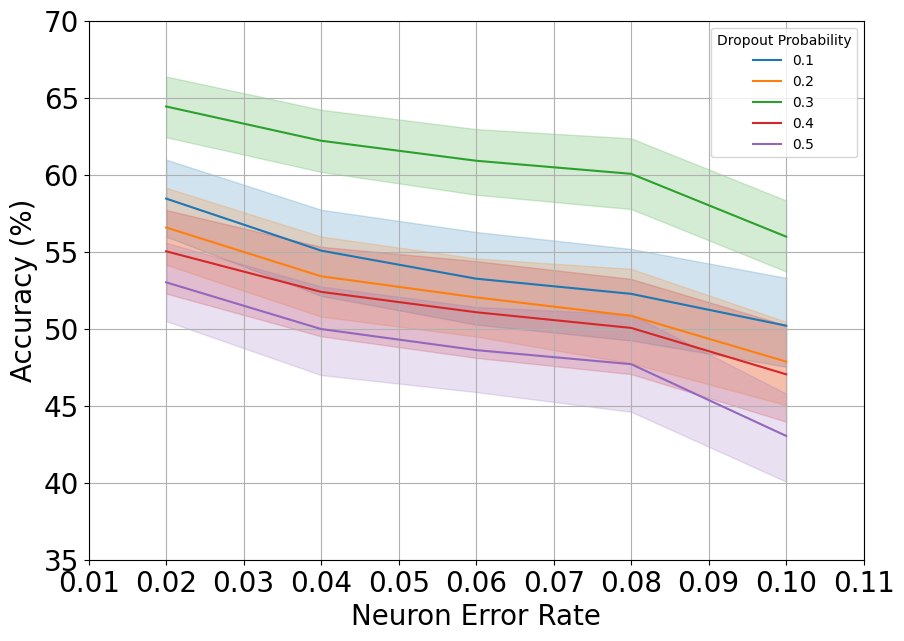

In [17]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.grid()
# fault_classification = Final_report.groupby(['Dropout Probability', 'block_fault_rate'])['img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked'].mean().reset_index()
sns.lineplot(data=Final_report, x='neuron_fault_rate',y='fault_ACC@1', hue='Dropout Probability', palette='tab10', ax = ax)


ax.set_xlabel('Neuron Error Rate', fontsize=20)

ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), fontsize=20)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=20)
ax.set_ylabel('Accuracy (%)', fontsize=20)

Text(0, 0.5, 'MRAD (%)')

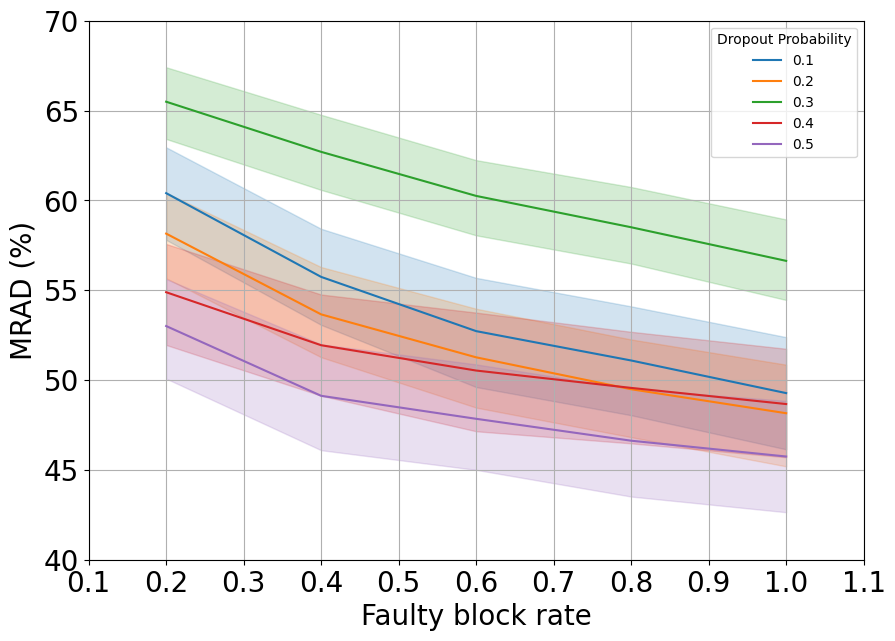

In [32]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.grid()
# fault_classification = Final_report.groupby(['Dropout Probability', 'block_fault_rate'])['img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked'].mean().reset_index()
sns.lineplot(data=Final_report, x='block_fault_rate',y='fault_ACC@1', hue='Dropout Probability', palette='tab10', ax = ax)


ax.set_xlabel('Faulty block rate', fontsize=20)

ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), fontsize=20)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=20)
ax.set_ylabel('MRAD (%)', fontsize=20)

Text(0, 0.5, 'MRAD (%)')

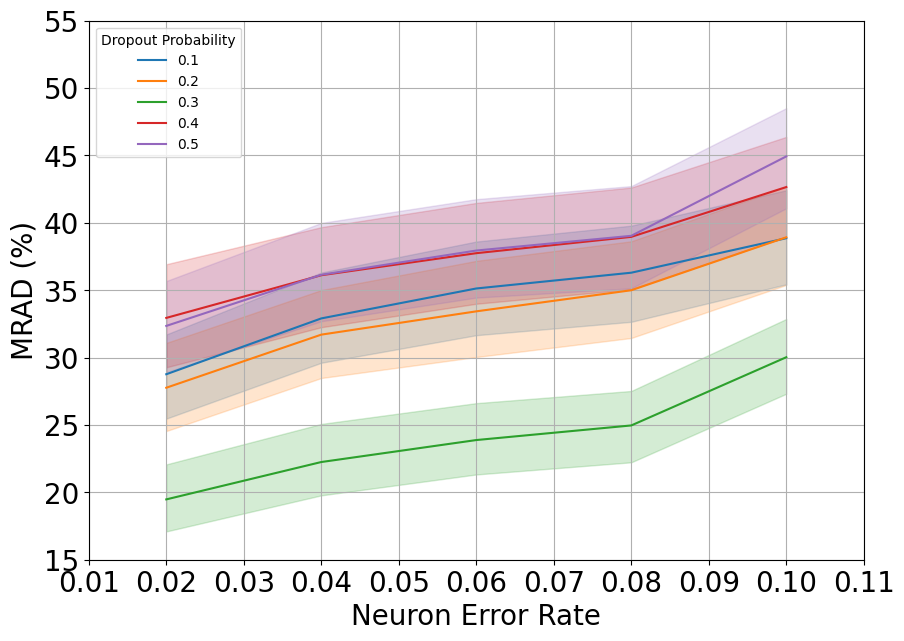

In [18]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.grid()
# fault_classification = Final_report.groupby(['Dropout Probability', 'block_fault_rate'])['img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked'].mean().reset_index()
sns.lineplot(data=Final_report, x='neuron_fault_rate',y='MRAD', hue='Dropout Probability', palette='tab10', ax = ax)


ax.set_xlabel('Neuron Error Rate', fontsize=20)

ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), fontsize=20)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=20)
ax.set_ylabel('MRAD (%)', fontsize=20)

Text(0, 0.5, 'MRAD (%)')

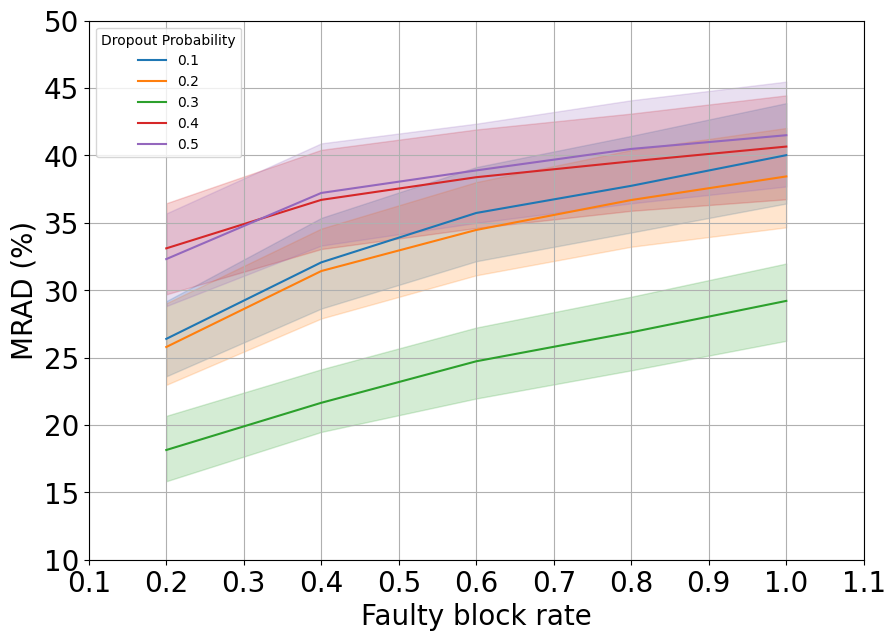

In [19]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.grid()
# fault_classification = Final_report.groupby(['Dropout Probability', 'block_fault_rate'])['img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked'].mean().reset_index()
sns.lineplot(data=Final_report, x='block_fault_rate',y='MRAD', hue='Dropout Probability', palette='tab10', ax = ax)


ax.set_xlabel('Faulty block rate', fontsize=20)

ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), fontsize=20)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=20)
ax.set_ylabel('MRAD (%)', fontsize=20)

Text(0, 0.5, 'Accuracy (%)')

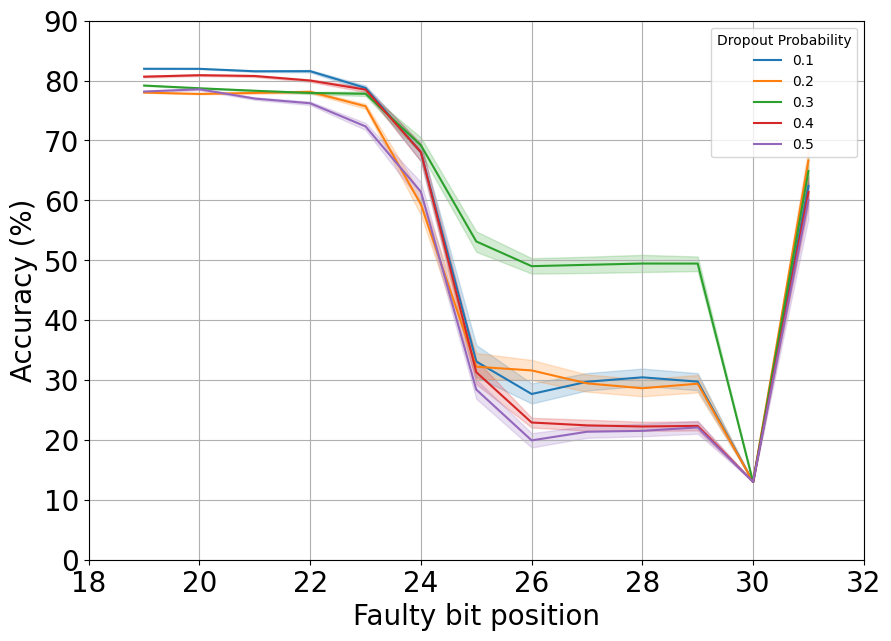

In [20]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.grid()
# fault_classification = Final_report.groupby(['Dropout Probability', 'block_fault_rate'])['img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked'].mean().reset_index()
sns.lineplot(data=Final_report, x='bit_faulty_pos',y='fault_ACC@1', hue='Dropout Probability', palette='tab10', ax = ax)


ax.set_xlabel('Faulty bit position', fontsize=20)

ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), fontsize=20)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=20)
ax.set_ylabel('Accuracy (%)', fontsize=20)

## F1 score, 
F1 score is more important becuase it gives insight about the generalization capabilities of the neural network and dropout should avoid overfitting, then improve generalization capabilities

Text(0, 0.5, 'F1 score (%)')

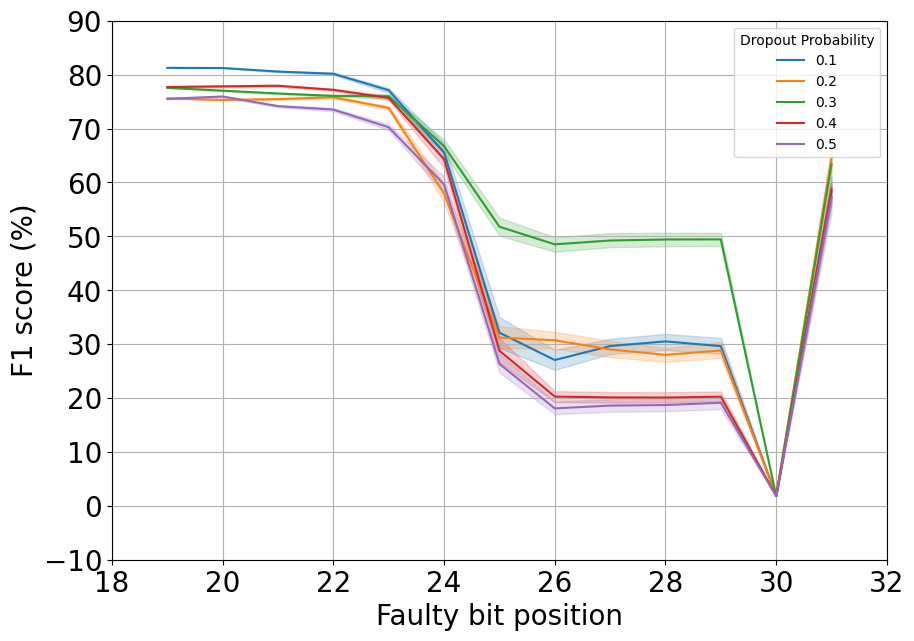

In [21]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.grid()
# fault_classification = Final_report.groupby(['Dropout Probability', 'block_fault_rate'])['img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked'].mean().reset_index()
sns.lineplot(data=Final_report, x='bit_faulty_pos',y='fault_f1@1', hue='Dropout Probability', palette='tab10', ax = ax)


ax.set_xlabel('Faulty bit position', fontsize=20)

ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), fontsize=20)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=20)
ax.set_ylabel('F1 score (%)', fontsize=20)

Text(0, 0.5, 'F1 score (%)')

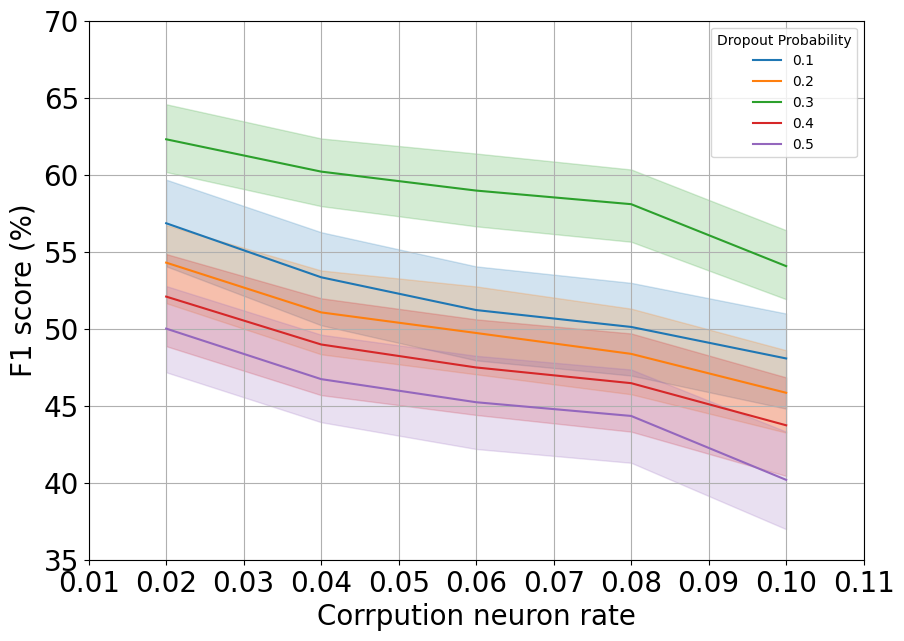

In [22]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.grid()
# fault_classification = Final_report.groupby(['Dropout Probability', 'block_fault_rate'])['img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked'].mean().reset_index()
sns.lineplot(data=Final_report, x='neuron_fault_rate',y='fault_f1@1', hue='Dropout Probability', palette='tab10', ax = ax)


ax.set_xlabel('Corrpution neuron rate', fontsize=20)

ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), fontsize=20)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=20)
ax.set_ylabel('F1 score (%)', fontsize=20)

Text(0, 0.5, 'F1 score (%)')

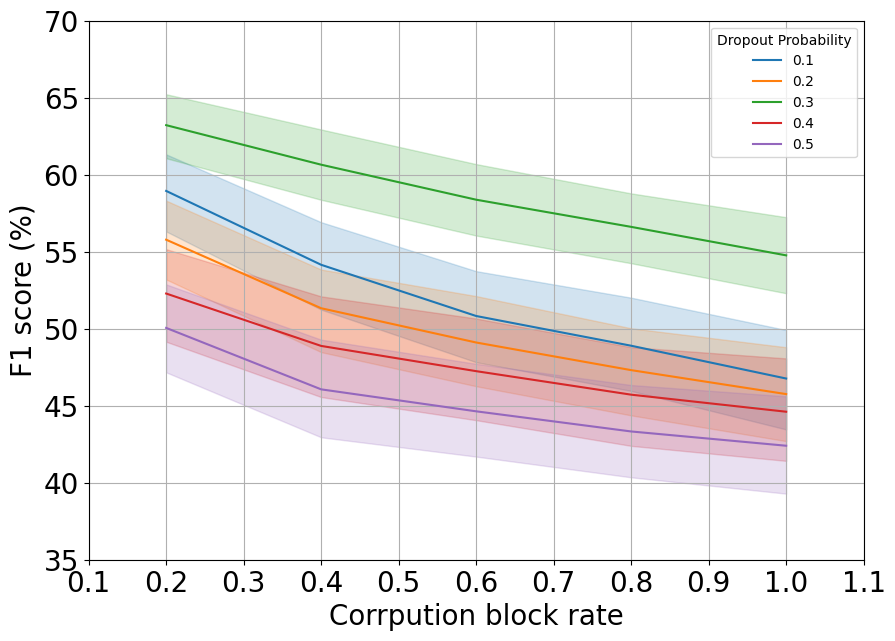

In [23]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.grid()
# fault_classification = Final_report.groupby(['Dropout Probability', 'block_fault_rate'])['img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked'].mean().reset_index()
sns.lineplot(data=Final_report, x='block_fault_rate',y='fault_f1@1', hue='Dropout Probability', palette='tab10', ax = ax)


ax.set_xlabel('Corrpution block rate', fontsize=20)

ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), fontsize=20)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=20)
ax.set_ylabel('F1 score (%)', fontsize=20)

## Precision 

Text(0, 0.5, 'Precision (%)')

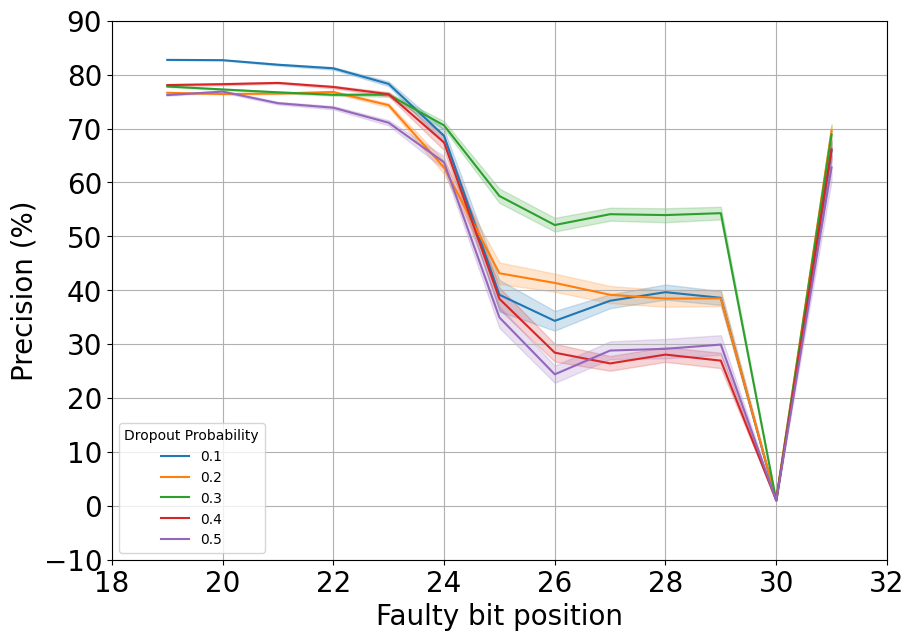

In [24]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.grid()
# fault_classification = Final_report.groupby(['Dropout Probability', 'block_fault_rate'])['img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked'].mean().reset_index()
sns.lineplot(data=Final_report, x='bit_faulty_pos',y='fault_prec@1', hue='Dropout Probability', palette='tab10', ax = ax)


ax.set_xlabel('Faulty bit position', fontsize=20)

ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), fontsize=20)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=20)
ax.set_ylabel('Precision (%)', fontsize=20)

## Recall

Text(0, 0.5, 'Recall (%)')

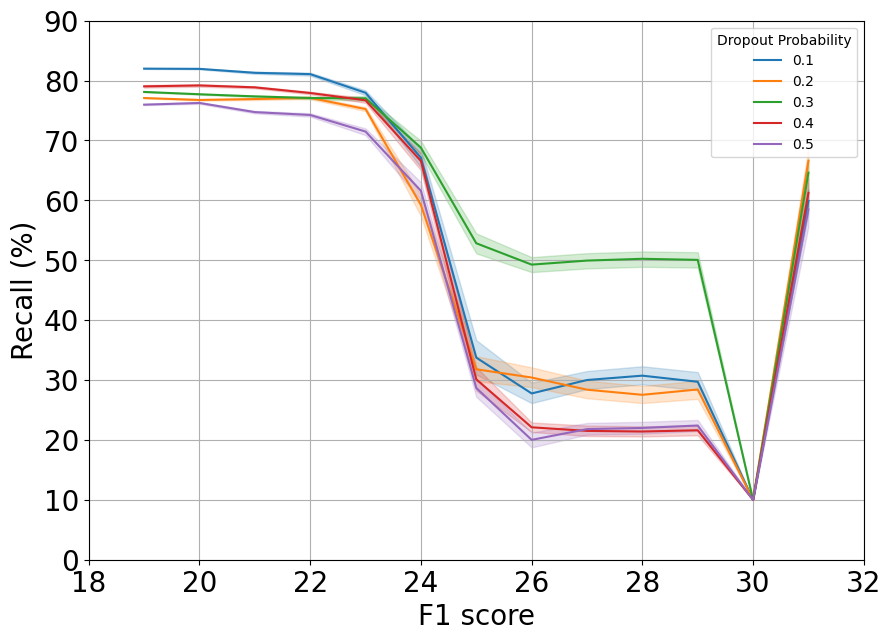

In [25]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.grid()
# fault_classification = Final_report.groupby(['Dropout Probability', 'block_fault_rate'])['img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked'].mean().reset_index()
sns.lineplot(data=Final_report, x='bit_faulty_pos',y='fault_rec@1', hue='Dropout Probability', palette='tab10', ax = ax)


ax.set_xlabel('F1 score', fontsize=20)

ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), fontsize=20)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=20)
ax.set_ylabel('Recall (%)', fontsize=20)